# Homework 3

In [104]:
# importing libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import skew
from scipy.stats import yeojohnson
from sklearn.ensemble import RandomForestClassifier
from meteostat import Stations, Daily
from datetime import datetime, timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [105]:
datapath = Path('data')
path = datapath / 'class.csv' 
class_df = pd.read_csv(path)

## 1.0

All of the exercises in 1. are based on the `class.csv` dataset


## 1.1

Perform EDA on the dataset. Describe what you are seeing. Clean the data

In [106]:
class_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [107]:
class_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [108]:
# Descriptive statistics
print(class_df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000      

In [109]:
# Information about data type and non-null counts
print(class_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [110]:
print(class_df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


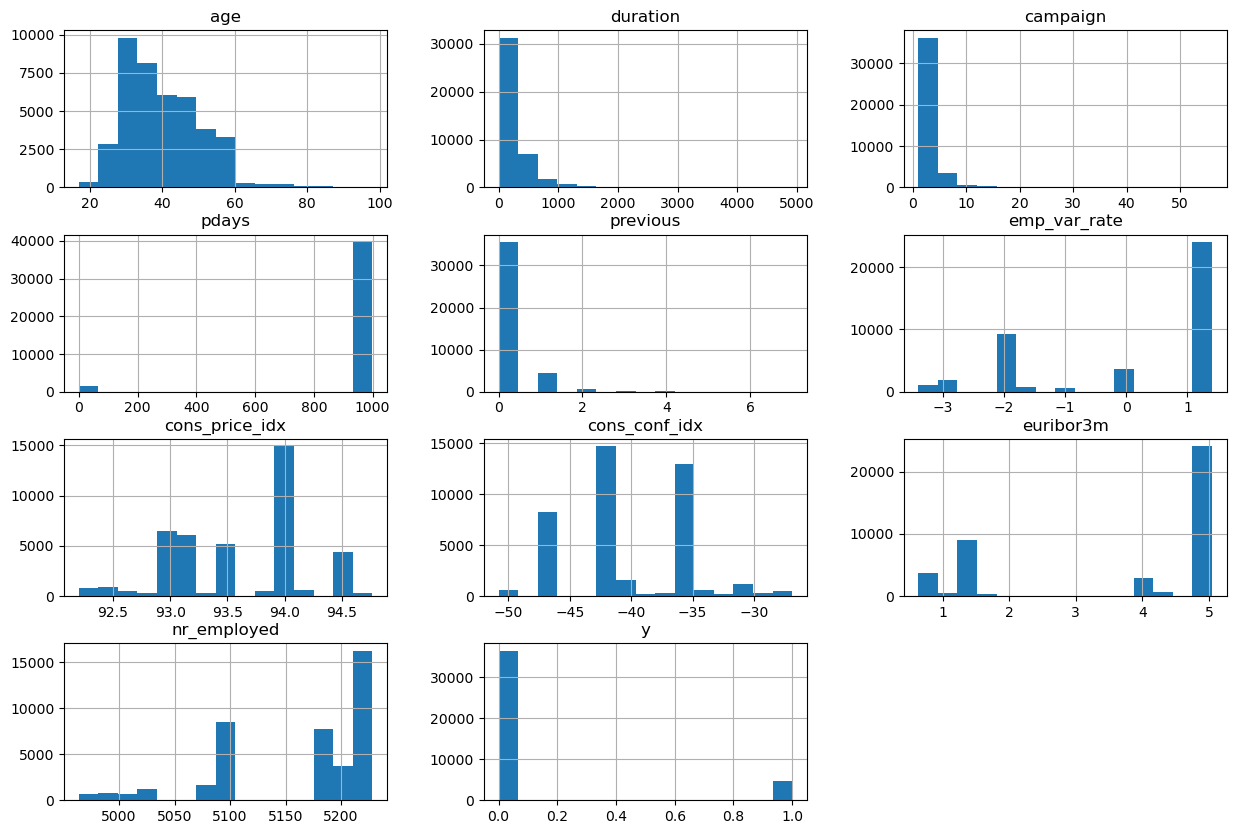

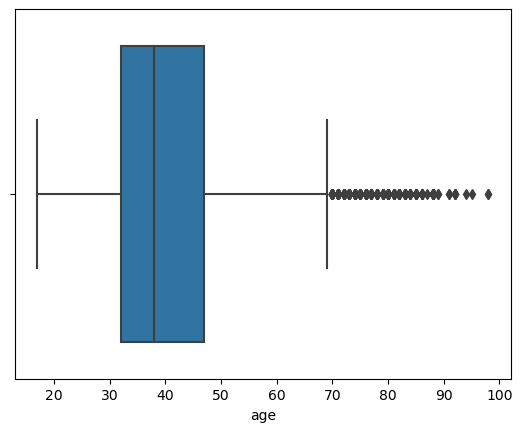

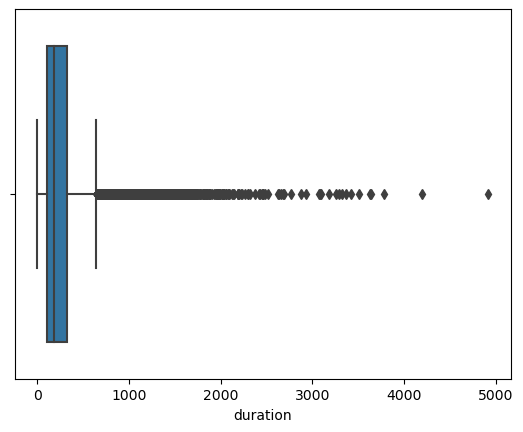

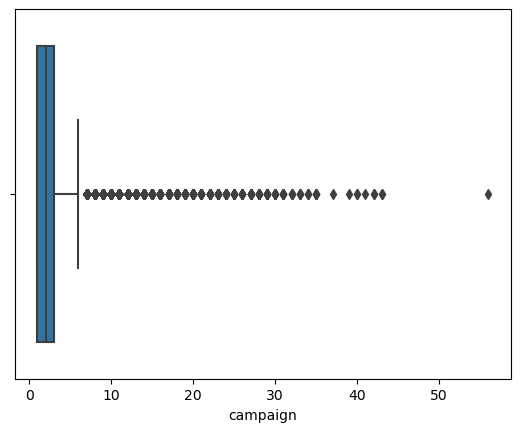

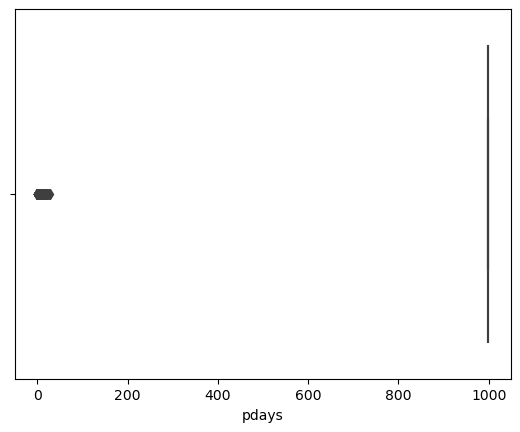

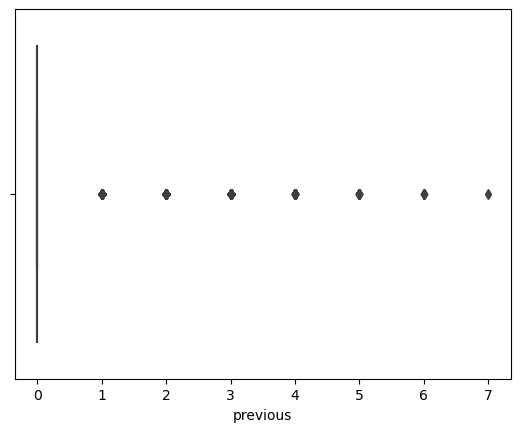

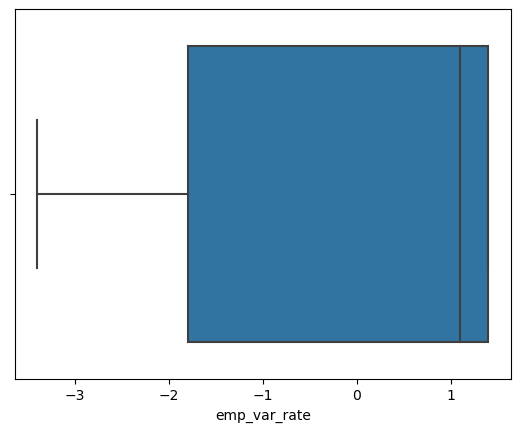

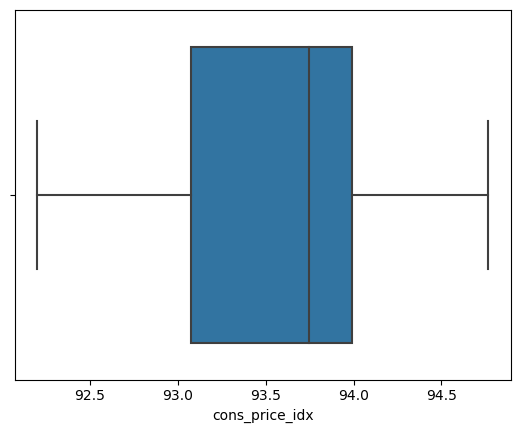

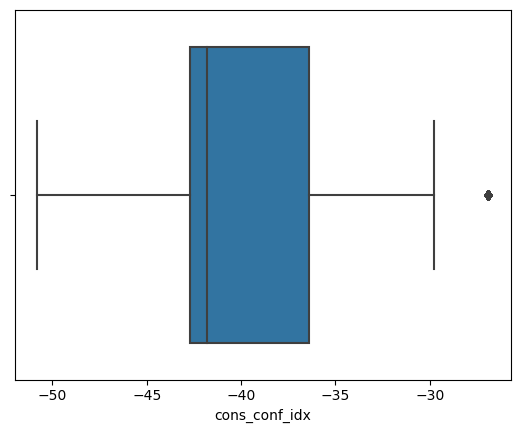

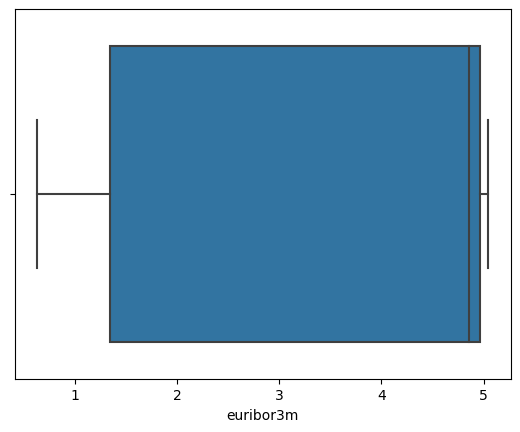

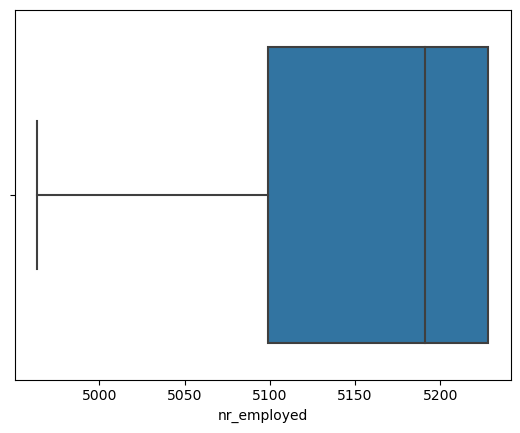

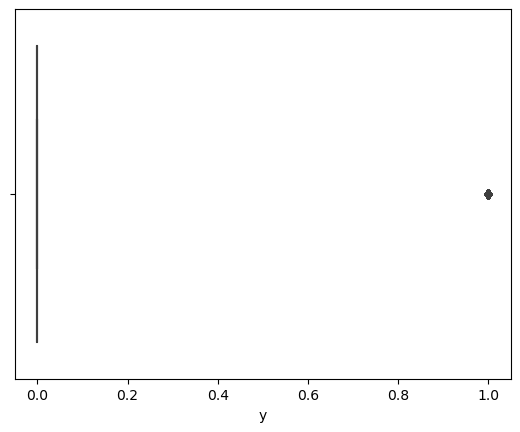

In [111]:
# Histograms for numeric data
class_df.hist(bins=15, figsize=(15, 10))
plt.show()

# Box plots to identify outliers
for column in class_df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure()
    sns.boxplot(x=class_df[column])


In [112]:
# Convert int64 columns to int16
int_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'y']
class_df[int_columns] = class_df[int_columns].astype('int16')

# Convert float64 columns to float32
float_columns = ['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
class_df[float_columns] = class_df[float_columns].astype('float32')

# Convert object columns to category
category_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
class_df[category_columns] = class_df[category_columns].astype('category')

# Check the memory usage after conversion
print(class_df.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int16   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int16   
 11  campaign        41188 non-null  int16   
 12  pdays           41188 non-null  int16   
 13  previous        41188 non-null  int16   
 14  poutcome        41188 non-null  category
 15  emp_var_rate    41188 non-null  float32 
 16  cons_price_idx  41188 non-null  float32 
 17  cons_conf_id

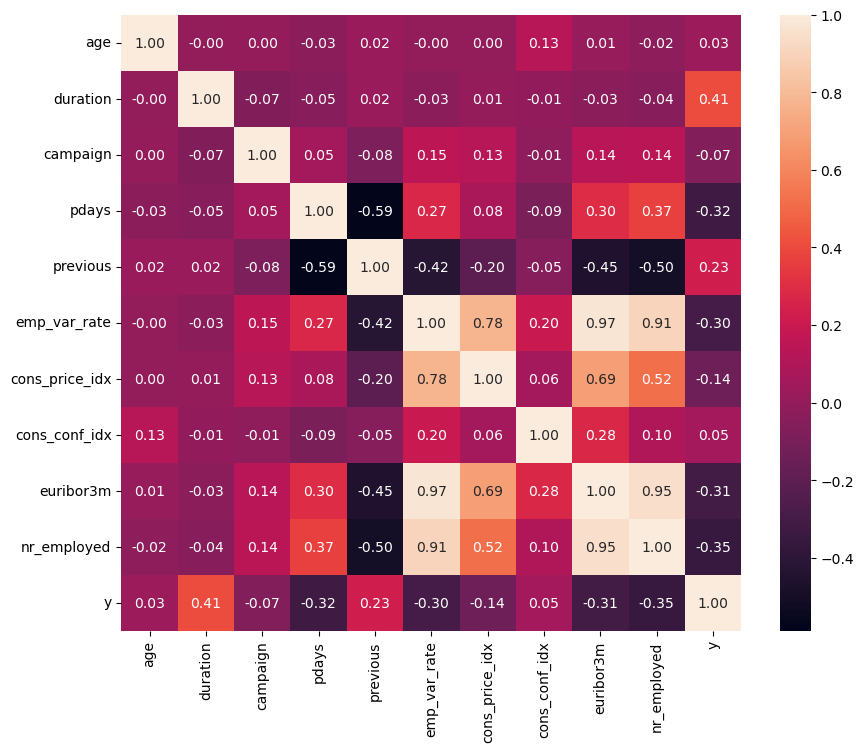

In [113]:
# Drop non-numeric columns if they are not relevant for correlation
numeric_df = class_df.select_dtypes(include=['number'])

# Replace non-numeric values representing missing data with NaN
numeric_df = numeric_df.replace('nonexistent', pd.NA)

# Convert the DataFrame to numeric data type
numeric_df = numeric_df.apply(pd.to_numeric)

# Now, you can calculate the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.show()

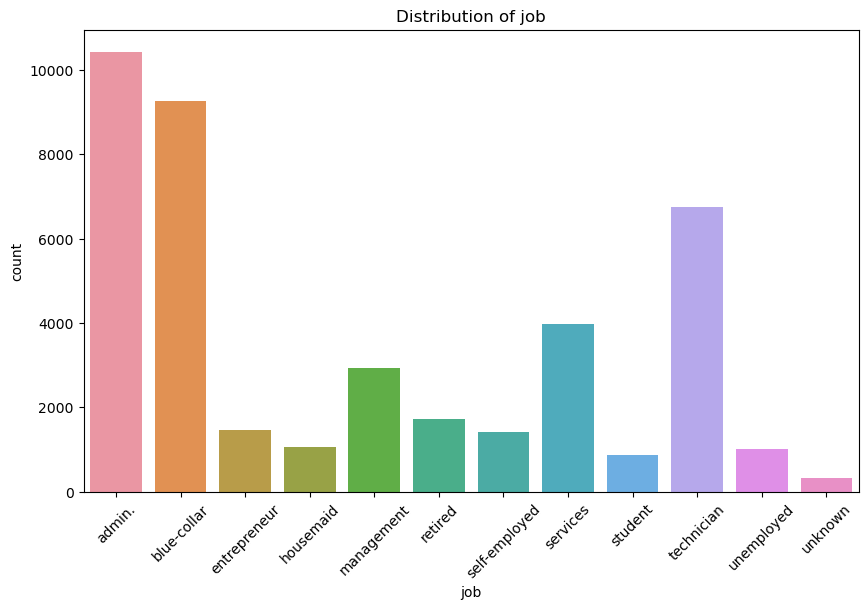

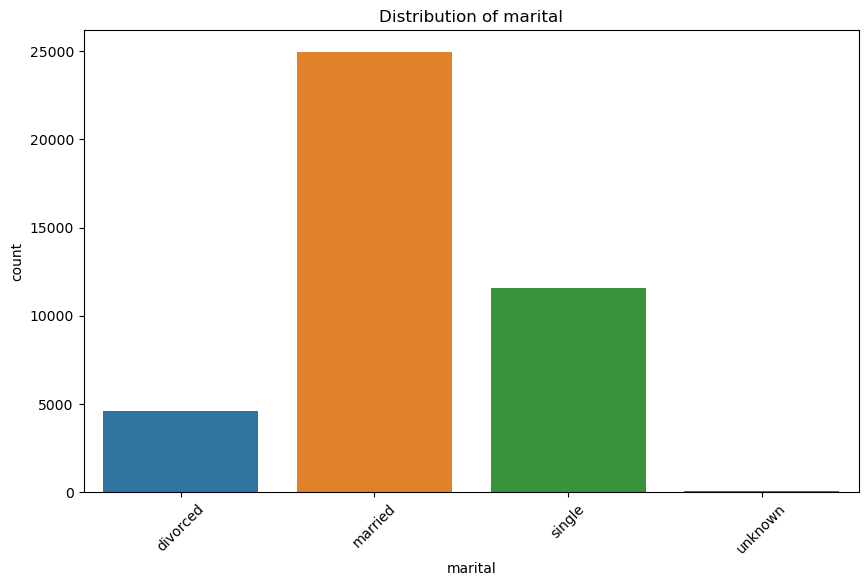

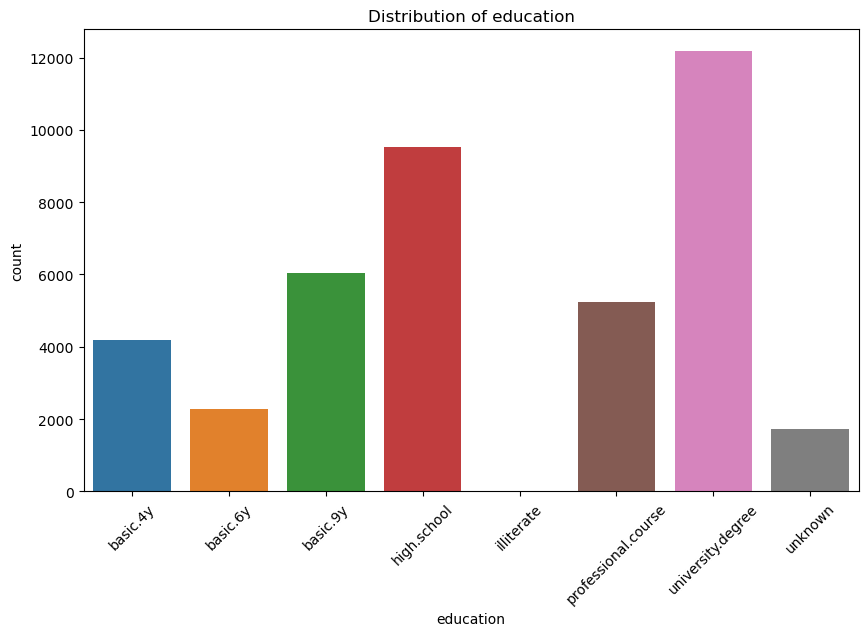

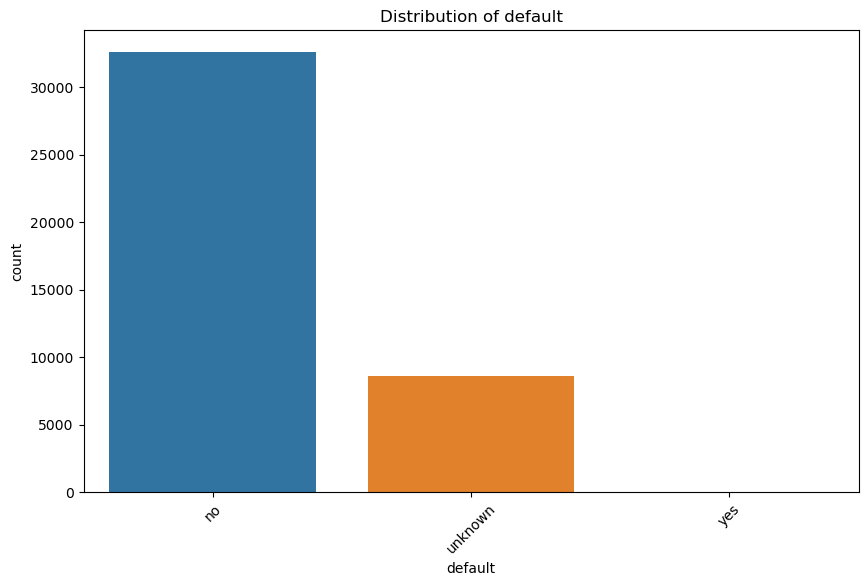

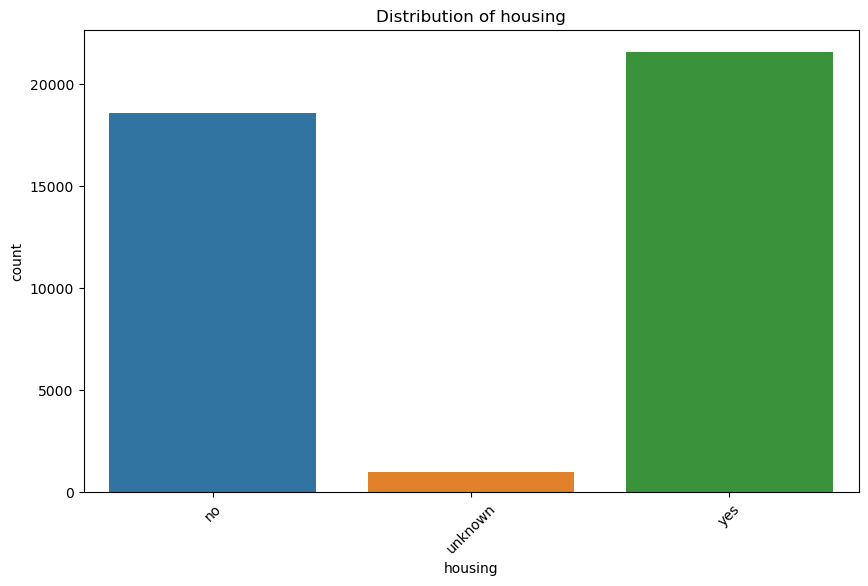

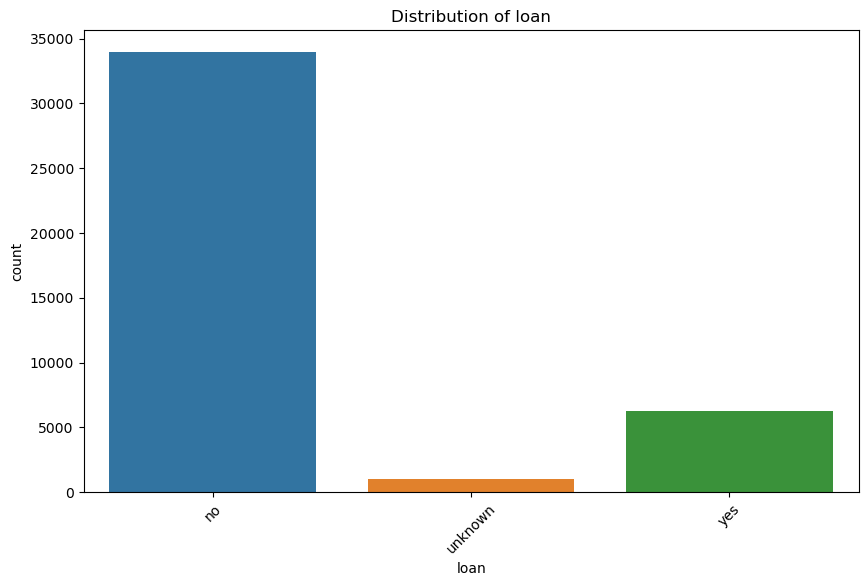

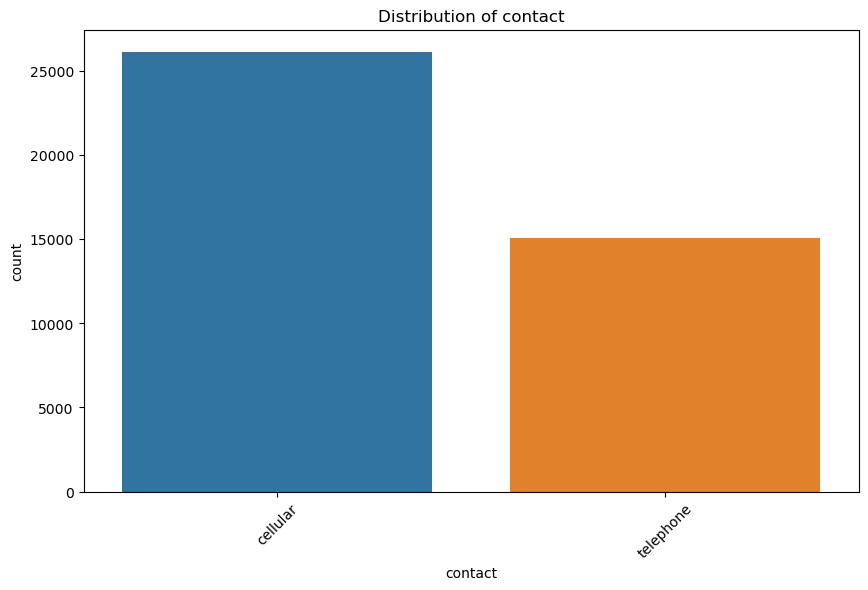

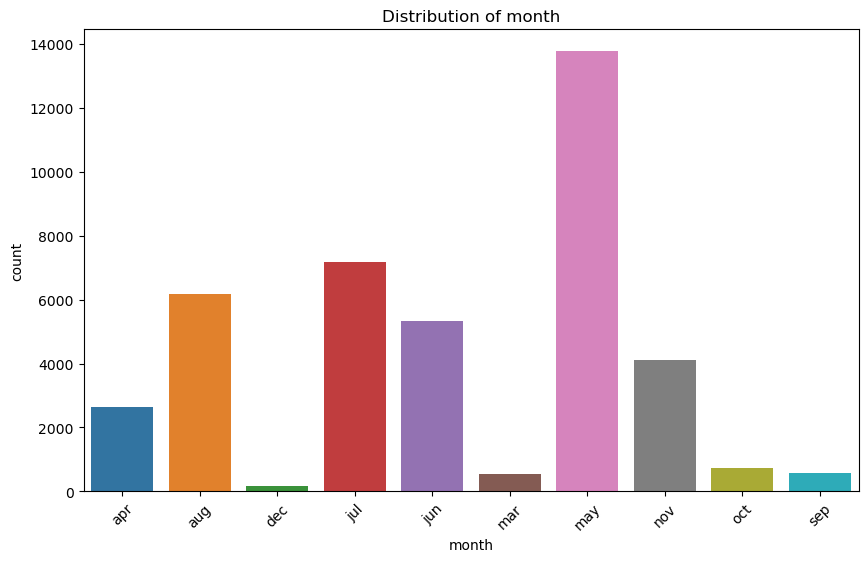

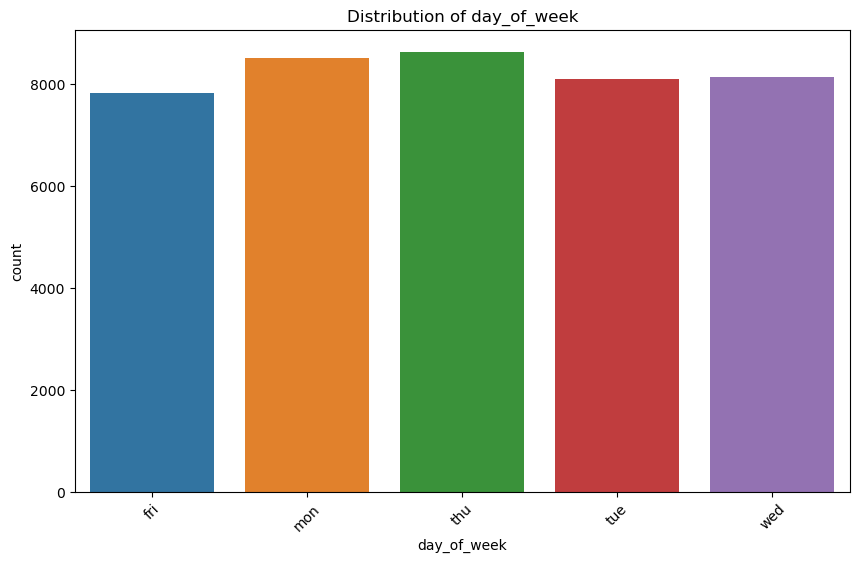

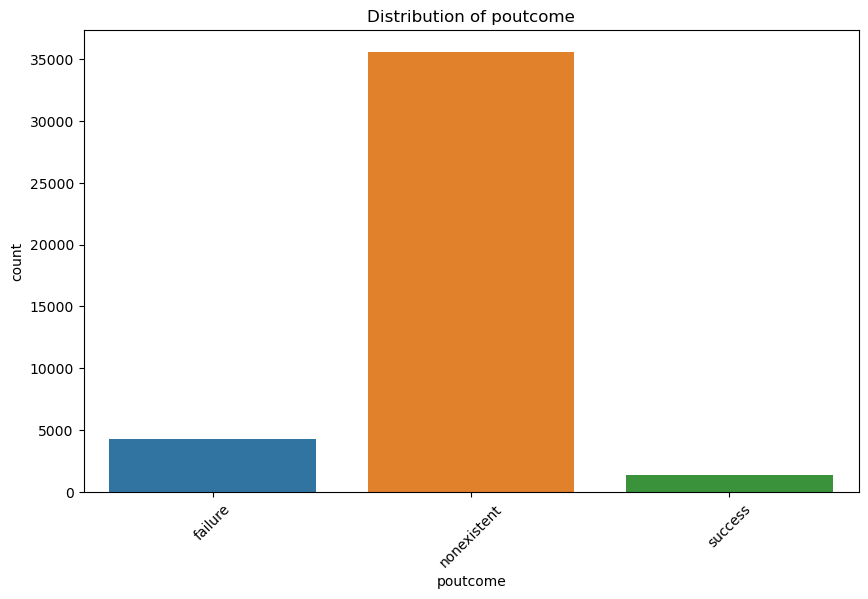

In [114]:
# Visualize distribution of categorical variables
for column in class_df.select_dtypes(include='category').columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=class_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

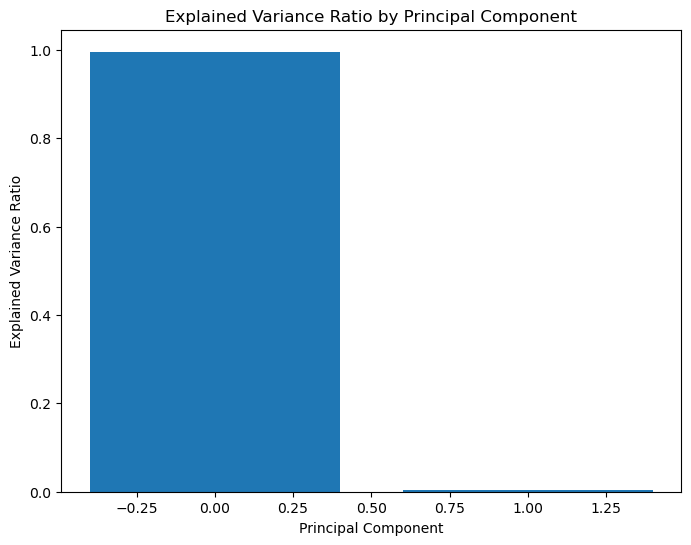

In [117]:
# Example of PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(class_df.select_dtypes(include=['int', 'float']))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

In [118]:
# Print the shape of the DataFrame before removing duplicates
print("Shape before removing duplicates:", class_df.shape)

# Remove duplicate rows
class_df.drop_duplicates(inplace=True)

# Print the shape of the DataFrame after removing duplicates
print("Shape after removing duplicates:", class_df.shape)


Shape before removing duplicates: (41176, 21)
Shape after removing duplicates: (41176, 21)


Based on the EDA and the cleaning, it was seen tha the dataset has 20 columns with both numeric and categorial variables. The datatypes were converted for the most efficient data type. It was also seen low correlation between the variables. There were no missing values. The duplicates found were removed as well. 

## 1.2

Analyse the features for skewness and transform the highly skewed features. Retrain the modell and evaluate the difference.

In [119]:
skewness_before = class_df[['duration', 'campaign', 'previous']].skew()
print("Skewness before transformation:")
print(skewness_before)

for column in ['duration', 'campaign', 'previous']:
   
    class_df[column] = np.log1p(class_df[column])


skewness_after = class_df[['duration', 'campaign', 'previous']].skew()
print("\nSkewness after transformation:")
print(skewness_after)

Skewness before transformation:
duration    3.262808
campaign    4.762044
previous    3.831396
dtype: float64

Skewness after transformation:
duration   -0.421498
campaign    1.350266
previous    2.586510
dtype: float32


In [120]:
# Ensure only numeric features are selected for skewness calculation
numeric_feats = class_df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns

# Calculate skewness and filter on threshold
skewness = class_df[numeric_feats].apply(lambda x: skew(x.dropna()))
high_skew = skewness[abs(skewness) > 1]
print("Highly skewed features:", high_skew)


Highly skewed features: campaign       1.350216
previous       2.586416
nr_employed   -1.044288
dtype: float64


In [121]:
# Apply Yeo-Johnson transformation to each skewed feature
for feature in high_skew.index:
    # Skip transforming the target variable if it's for classification
    if feature != 'y':  # Assuming 'y' is your target variable
        class_df[feature], _ = yeojohnson(class_df[feature])

In [122]:
# Preparing the dataset for modeling
# Drop the target variable 'y' from the features dataset if 'y' is indeed your target
X = class_df.drop(['y'], axis=1)  # Drop other non-feature columns if necessary
y = class_df['y']  # This assumes 'y' is the target variable for classification

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
# Print unique values for each column in X_train
print("Unique values in X_train:")
for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f"Column '{column}': {unique_values}")

# Print unique values for y_train
print("Unique values in y_train:", y_train.unique())


Unique values in X_train:
Column 'age': [38 35 36 98 34 33 28 24 32 59 37 31 30 48 42 47 46 44 54 39 55 29 40 25
 45 27 53 43 60 26 67 20 51 56 41 52 19 49 58 50 21 23 57 61 72 76 62 22
 73 81 65 64 71 80 77 70 86 18 82 78 88 66 85 68 69 83 63 17 74 75 91 79
 84 89 87 92 94]
Column 'job': ['services', 'technician', 'retired', 'blue-collar', 'admin.', ..., 'self-employed', 'unknown', 'entrepreneur', 'management', 'housemaid']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
Column 'marital': ['married', 'single', 'divorced', 'unknown']
Categories (4, object): ['divorced', 'married', 'single', 'unknown']
Column 'education': ['high.school', 'professional.course', 'basic.4y', 'basic.9y', 'university.degree', 'unknown', 'basic.6y', 'illiterate']
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']
Column 

In [124]:
# Define categorical and numerical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)])

# Apply preprocessing to training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Print the shape of preprocessed data
print("Shape of preprocessed training data:", X_train_preprocessed.shape)


Shape of preprocessed training data: (32940, 63)


In [125]:
# One-hot encode categorical variables
class_df_encoded = pd.get_dummies(class_df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

# Split the data into features (X) and target variable (y)
X = class_df_encoded.drop(columns=['y'])
y = class_df_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.9117289946576008
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7316
           1       0.65      0.47      0.54       920

    accuracy                           0.91      8236
   macro avg       0.79      0.72      0.75      8236
weighted avg       0.90      0.91      0.91      8236



In [126]:
# Calculate skewness before transformation
skewness_before = class_df.select_dtypes(include=['int64', 'float64']).skew()
print("Skewness before transformation:")
print(skewness_before)

# Apply logarithmic transformation to highly skewed numerical features
numeric_feats = class_df.select_dtypes(include=['int64', 'float64']).columns
high_skew = skewness_before[abs(skewness_before) > 1]
for feature in high_skew.index:
    if feature != 'y':  # Skip target variable if it's included
        class_df[feature] = np.log1p(class_df[feature])

# Calculate skewness after transformation
skewness_after = class_df.select_dtypes(include=['int64', 'float64']).skew()
print("\nSkewness after transformation:")
print(skewness_after)

# Ensure 'y' column is included in numerical columns
numerical_columns = class_df.select_dtypes(include=['int64', 'float64']).columns

# Define categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)])

# Apply preprocessing to the entire dataset
X_processed = preprocessor.fit_transform(class_df.drop(columns=['y']))
y_processed = class_df['y']

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Skewness before transformation:
Series([], dtype: float64)

Skewness after transformation:
Series([], dtype: float64)
Accuracy: 0.8838028169014085
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7316
           1       0.46      0.23      0.31       920

    accuracy                           0.88      8236
   macro avg       0.68      0.60      0.62      8236
weighted avg       0.86      0.88      0.87      8236



## 1.3

Find the features that have a high amount of zero values. Engineer flag features (boolean) for all variables that have at least 100 observations in both the 'yes' and 'no' columns. Retrain the modell and evaluate the difference.

In [127]:
# Identify numeric features and calculate skewness
numeric_feats = class_df.select_dtypes(include=[np.number]).columns
skewness = class_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Filter features with high skewness
high_skew = skewness[abs(skewness) > 1]
print("Highly skewed features:", high_skew)

# Apply Yeo-Johnson transformation to each skewed feature
for feature in high_skew.index:
    class_df[feature], _ = yeojohnson(class_df[feature])

# Preparing the dataset for modeling (assuming 'y' is your continuous target variable)
X = pd.get_dummies(class_df.drop(['y'], axis=1))  # One-Hot Encode categorical variables
y = class_df['y']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retraining the model with the encoded features using a regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model's performance using RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE after transforming skewed features:", rmse)

   

Highly skewed features: y           2.450106
previous    2.116225
pdays      -4.921207
dtype: float64
RMSE after transforming skewed features: 0.019055335202145928


## 1.4

Encode the categorical features. Retrain the model and evaluate the difference.

In [129]:
# Encode categorical features excluding the target variable 'y'
X = pd.get_dummies(class_df.drop(['y'], axis=1))

# Encode the target variable for classification
le = LabelEncoder()
y_encoded = le.fit_transform(class_df['y'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the classification model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.911121903836814


## 1.5
Implement a Scaled version with all the engineered features. Retrain the model and evaluate the results.

In [130]:
# Preparing data (ensure 'y' is encoded if it's categorical)
le = LabelEncoder()
y_encoded = le.fit_transform(class_df['y'])
X = pd.get_dummies(class_df.drop(['y'], axis=1))  # Features are encoded

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retraining the model with scaled features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, predictions)
print("Accuracy with Scaled Features:", accuracy_scaled)


Accuracy with Scaled Features: 0.9093006313744536


## 1.6
Select a good featureset manually. Retrain the model and evaluate the results.

In [131]:
# Step 1: Encode the target variable if it's categorical
le = LabelEncoder()
y_encoded = le.fit_transform(class_df['y'])

# Step 2: Select and encode the chosen featureset manually
selected_features = ['age', 'job', 'education', 'duration', 'pdays', 'previous']
X_selected = pd.get_dummies(class_df[selected_features])  # Encode categorical features

# Step 3: Split the dataset
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Step 4: Retrain the model
model_sel = RandomForestClassifier(random_state=42)
model_sel.fit(X_train_sel, y_train_sel)

# Step 5: Make predictions and evaluate the model
predictions_sel = model_sel.predict(X_test_sel)
accuracy_sel = accuracy_score(y_test_sel, predictions_sel)
print("Accuracy with Selected Features:", accuracy_sel)


Accuracy with Selected Features: 0.8873239436619719


## 1.7
Create engineered features and add them. Experiment with best feature combination. Retrain the model and evaluate the results.

In [132]:
class_df['age_duration_interaction'] = class_df['age'] * class_df['duration']

# Define your feature set including new engineered features
features = ['age', 'job', 'education', 'duration', 'pdays', 'previous', 'age_duration_interaction']

# Encode the target variable
y = class_df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Adjust based on your target variable's encoding needs

# Split the data
X_train, X_test, y_train, y_test = train_test_split(class_df[features], y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
numerical_features = ['age', 'duration', 'pdays', 'previous', 'age_duration_interaction']
categorical_features = ['job', 'education']  # Add other categorical features as needed

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Training the model
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


Model accuracy: 1.0000


## 1.8

Put it all together. Create the best logistic regression model for this dataset.

In [133]:
# Encode target variable if necessary
le = LabelEncoder()
class_df['y_encoded'] = le.fit_transform(class_df['y'])

# Splitting the dataset into features and target variable
X = class_df.drop(['y', 'y_encoded'], axis=1)
y = class_df['y_encoded']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Creating preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Creating a pipeline that combines the preprocessor with a logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__solver': ['liblinear', 'lbfgs']}

search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best CV accuracy:", search.best_score_)

# Retraining the model on the entire training set using the best parameters
best_model = search.best_estimator_

# Predictions and evaluation
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Test set accuracy:", accuracy)
print(classification_report(y_test, predictions))


Best parameters: {'classifier__C': 0.0006951927961775605, 'classifier__solver': 'liblinear'}
Best CV accuracy: 0.8982695810564664
Test set accuracy: 0.8957017969888296
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7316
           1       0.60      0.19      0.29       920

    accuracy                           0.90      8236
   macro avg       0.76      0.59      0.62      8236
weighted avg       0.87      0.90      0.87      8236



## 1.9

Try the same with a decision tree classifier.  Retrain the model and evaluate the results.

In [134]:
# Splitting the dataset into features and target variable
X = class_df.drop(['y', 'y_encoded'], axis=1)
y = class_df['y_encoded']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Creating preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Creating a pipeline that combines the preprocessor with a decision tree classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]}

search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best CV accuracy:", search.best_score_)

# Retraining the model on the entire training set using the best parameters
best_model = search.best_estimator_

# Predictions and evaluation
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Test set accuracy:", accuracy)
print(classification_report(y_test, predictions))


Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Best CV accuracy: 0.8946569520340011
Test set accuracy: 0.8932734337056824
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7316
           1       0.56      0.22      0.32       920

    accuracy                           0.89      8236
   macro avg       0.73      0.60      0.63      8236
weighted avg       0.87      0.89      0.87      8236



## 2.0
Retrieve daily weather data from meteostat https://dev.meteostat.net/python/ for the last 20 years

In [135]:
# Find a weather station
stations = Stations()
stations = stations.nearby(50.0, 10.0) # Replace 50.0, 10.0 with your latitude and longitude
station = stations.fetch(1)

if not station.empty:
    # Get the first station ID
    station_id = station.index[0]

    # Define time range
    end_date = datetime.now()
    start_date = end_date - timedelta(days=20*365)  # 20 years

    # Get daily data
    data = Daily(station_id, start_date, end_date)
    data = data.fetch()

    # Print or process the data
    print(data.head())
else:
    print(f"No stations found near {location_name}. Please adjust the location.")


            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun
time                                                                  
2004-02-20   1.0  -2.7   6.8   0.0   0.0   NaN   NaN   NaN   NaN   NaN
2004-02-21  -0.2  -3.6   3.4   0.0   0.0   NaN   NaN   NaN   NaN   NaN
2004-02-22   0.8  -1.9   2.6   1.1   0.0   NaN   NaN   NaN   NaN   NaN
2004-02-23  -3.1  -5.2   2.8   0.0   0.0   NaN   NaN   NaN   NaN   NaN
2004-02-24  -1.5  -8.3   3.7   0.1   0.0   NaN   NaN   NaN   NaN   NaN


## 2.1
Analyse daily windspeeds similar to what we did in class for precipitations

Wind Speed Summary Statistics:
count    1134.000000
mean       11.086155
std         4.989574
min         3.500000
25%         7.400000
50%        10.050000
75%        13.600000
max        30.600000
Name: wspd, dtype: float64


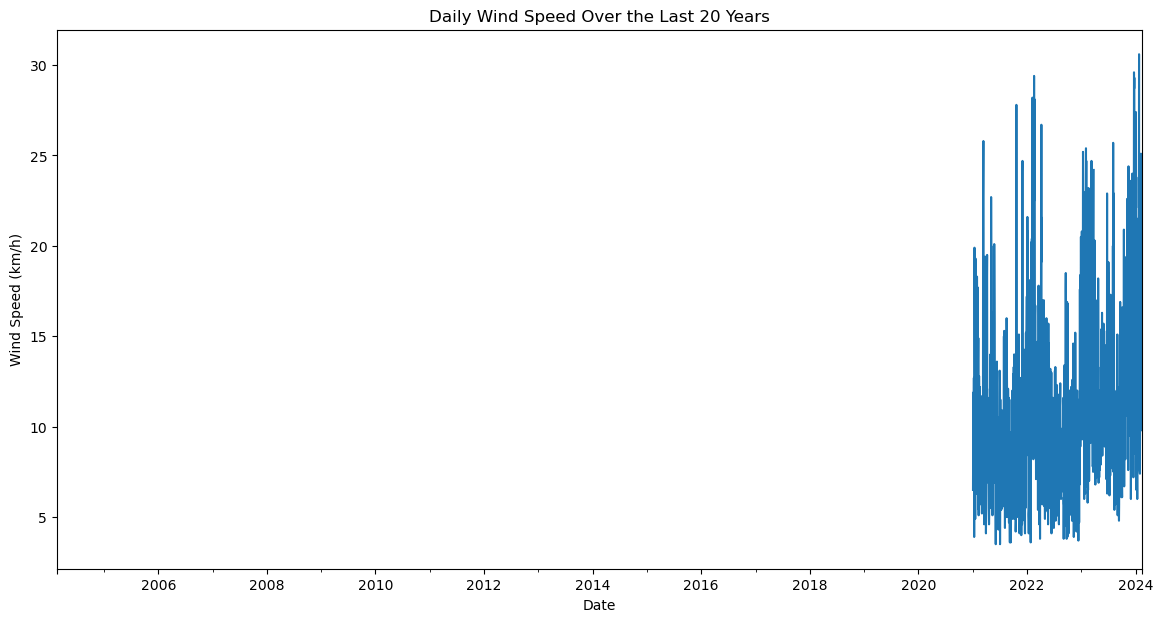

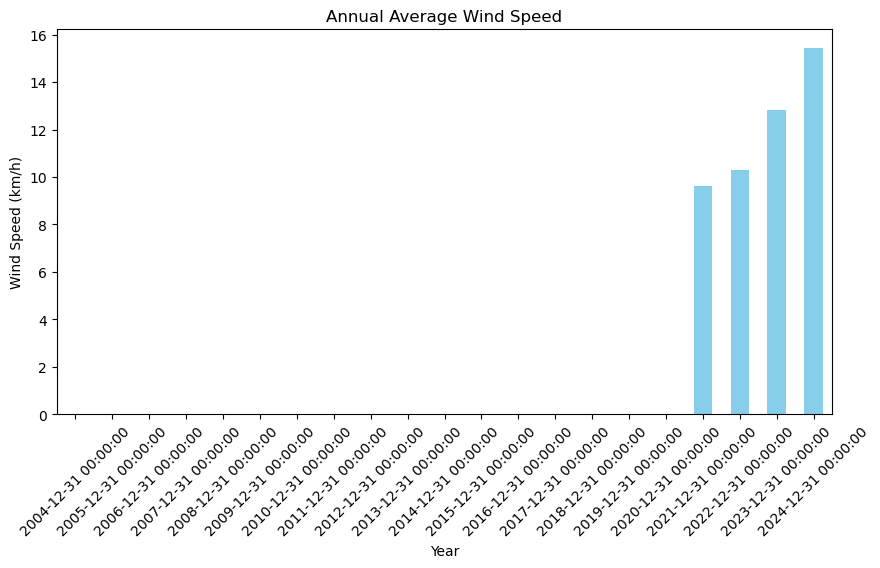

In [136]:
# Find the closest weather station (example uses generic lat/lon)
stations = Stations()
stations = stations.nearby(50.0, 10.0)  # Replace with your location's latitude and longitude
station = stations.fetch(1)

if not station.empty:
    # Assuming the station ID is the first in the list
    station_id = station.index[0]

    # Define the time range: last 20 years
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365 * 20)

    # Fetch daily data for the specified station and time range
    data = Daily(station_id, start_date, end_date)
    data = data.fetch()

    # Focus on wind speed data
    wind_speed_data = data['wspd']

    # Basic EDA: Summary statistics
    print("Wind Speed Summary Statistics:")
    print(wind_speed_data.describe())

    # Plotting the wind speed data
    plt.figure(figsize=(14, 7))
    wind_speed_data.plot(title='Daily Wind Speed Over the Last 20 Years')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (km/h)')
    plt.show()

    # More detailed analysis can include monthly/annual averages, trends, etc.
    # Example: Annual average wind speed
    annual_avg_wspd = wind_speed_data.resample('A').mean()
    plt.figure(figsize=(10, 5))
    annual_avg_wspd.plot(kind='bar', color='skyblue')
    plt.title('Annual Average Wind Speed')
    plt.xlabel('Year')
    plt.ylabel('Wind Speed (km/h)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No station found for the given location.")

## 2.2

Create a forecasting model to forecast monthly average windspeed

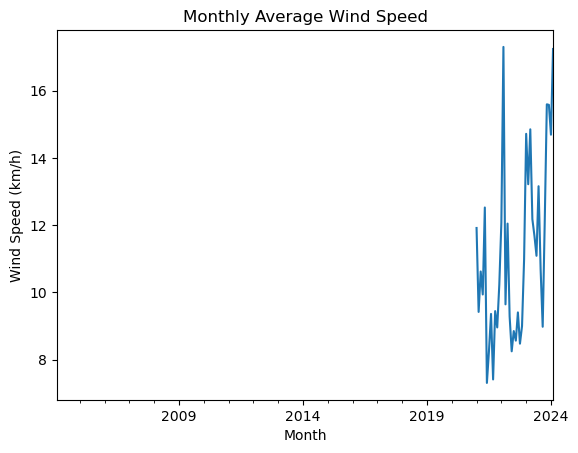

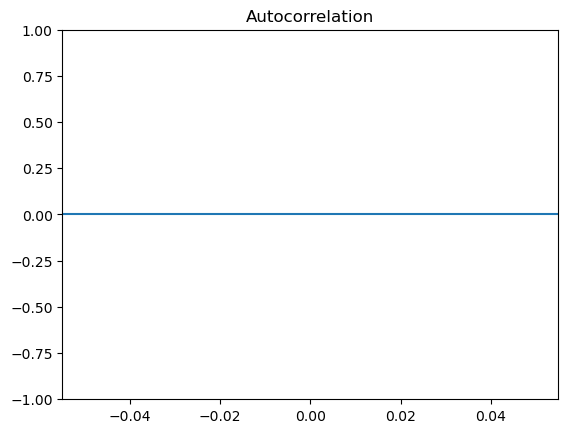

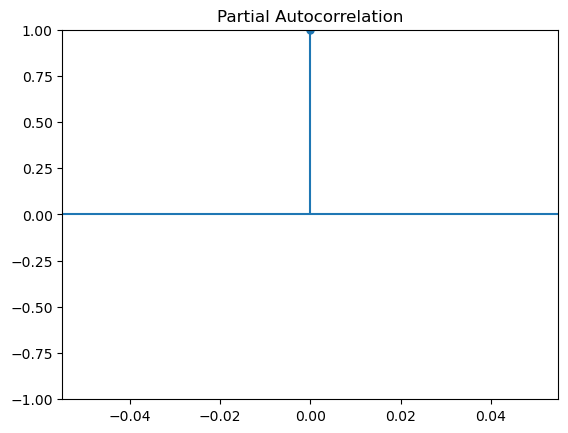

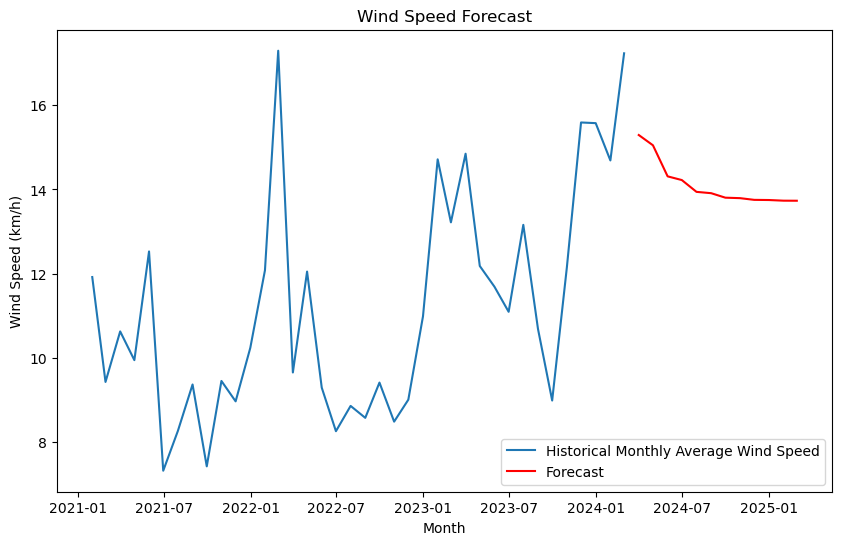

In [137]:
# Step 1: Aggregate daily data to monthly averages
monthly_avg_wspd = wind_speed_data.resample('M').mean()

# Basic plot of the monthly average wind speed
monthly_avg_wspd.plot(title='Monthly Average Wind Speed')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')
plt.show()

# Step 2: Analyze the time series
# Autocorrelation plot to help determine the AR term
plot_acf(monthly_avg_wspd)
plt.show()

# Partial autocorrelation plot to help determine the MA term
plot_pacf(monthly_avg_wspd)
plt.show()

# Step 3: Fit an ARIMA model
# The p, d, q parameters should be chosen based on the autocorrelation and partial autocorrelation plots
# This is a simplistic choice for demonstration; you may need to experiment with these parameters
model = ARIMA(monthly_avg_wspd, order=(2, 1, 2))
model_fit = model.fit()

# Step 4: Make forecasts
# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_wspd, label='Historical Monthly Average Wind Speed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Wind Speed Forecast')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()


$$\alpha^2$$